### Import the dependencies, libraries, modules, and the weather_api_key

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Add the requests library from Anaconda
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Import the API key.
from config import weather_api_key

### Add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.  In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

### Unpack the lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

### Build the basic URL for the OpenWeatherMap with weather_api_key added to the URL.

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1113308864fb7c97390b51d68b7ee217


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | bandar-e lengeh
Processing Record 6 of Set 1 | ambilobe
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | coihaique
Processing Record 12 of Set 1 | ostersund
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | westport
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | shimoda
Processing Record 18 of Set 1 | mandalgovi
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | camacupa
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | sai

Processing Record 36 of Set 4 | moguer
Processing Record 37 of Set 4 | kresttsy
Processing Record 38 of Set 4 | shelburne
Processing Record 39 of Set 4 | gwanda
Processing Record 40 of Set 4 | jambi
Processing Record 41 of Set 4 | marawi
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | nantucket
Processing Record 44 of Set 4 | zambezi
Processing Record 45 of Set 4 | vereeniging
Processing Record 46 of Set 4 | rawson
Processing Record 47 of Set 4 | porto novo
Processing Record 48 of Set 4 | teya
Processing Record 49 of Set 4 | teberda
Processing Record 50 of Set 4 | erice
Processing Record 1 of Set 5 | upata
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | umarkot
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | san ramon
Processing Record 7 of Set 5 | abu samrah
Processing Record 8 of Set 5 | mandera
Processing Record 9 of Set 5 | virovitica
Proces

Processing Record 27 of Set 8 | ovsyanka
Processing Record 28 of Set 8 | cazaje
City not found. Skipping...
Processing Record 29 of Set 8 | marsh harbour
Processing Record 30 of Set 8 | chateaubelair
Processing Record 31 of Set 8 | kieta
Processing Record 32 of Set 8 | muros
Processing Record 33 of Set 8 | xiamen
Processing Record 34 of Set 8 | chicama
Processing Record 35 of Set 8 | ust-ishim
Processing Record 36 of Set 8 | urucui
Processing Record 37 of Set 8 | burnie
Processing Record 38 of Set 8 | grand island
Processing Record 39 of Set 8 | milas
Processing Record 40 of Set 8 | port lincoln
Processing Record 41 of Set 8 | wahran
City not found. Skipping...
Processing Record 42 of Set 8 | kheri
Processing Record 43 of Set 8 | cocotitlan
Processing Record 44 of Set 8 | tilichiki
Processing Record 45 of Set 8 | taoudenni
Processing Record 46 of Set 8 | celestun
Processing Record 47 of Set 8 | tomatlan
Processing Record 48 of Set 8 | grand centre
City not found. Skipping...
Processing

Processing Record 13 of Set 12 | awbari
Processing Record 14 of Set 12 | lulea
Processing Record 15 of Set 12 | ajaccio
Processing Record 16 of Set 12 | vila do maio
Processing Record 17 of Set 12 | arganil
Processing Record 18 of Set 12 | isiro
Processing Record 19 of Set 12 | anjiang
Processing Record 20 of Set 12 | chimbote
Processing Record 21 of Set 12 | lingao
Processing Record 22 of Set 12 | fabriano
Processing Record 23 of Set 12 | tymovskoye
Processing Record 24 of Set 12 | verkhoshizhemye
Processing Record 25 of Set 12 | sailana
Processing Record 26 of Set 12 | saint anthony
Processing Record 27 of Set 12 | vilyuysk
Processing Record 28 of Set 12 | vestmannaeyjar
Processing Record 29 of Set 12 | harindanga
Processing Record 30 of Set 12 | penzance
Processing Record 31 of Set 12 | yar-sale
Processing Record 32 of Set 12 | dawlatabad
Processing Record 33 of Set 12 | amapa
Processing Record 34 of Set 12 | varhaug
Processing Record 35 of Set 12 | jalu
Processing Record 36 of Set 

In [10]:
len(city_data)

548

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,75.49,63,5,10.96,CV,2021-04-06 01:33:28
1,Rikitea,-23.1203,-134.9692,77.85,71,32,13.00,PF,2021-04-06 01:33:28
2,Chokurdakh,70.6333,147.9167,-9.78,85,23,1.48,RU,2021-04-06 01:33:29
3,Bandar-E Lengeh,26.5579,54.8807,64.40,68,0,4.61,IR,2021-04-06 01:33:29
4,Ambilobe,-13.2000,49.0500,73.18,94,100,2.51,MG,2021-04-06 01:33:30
5,Albany,42.6001,-73.9662,52.00,32,20,13.80,US,2021-04-06 01:33:09
6,Ushuaia,-54.8000,-68.3000,41.00,75,0,2.30,AR,2021-04-06 01:33:30
7,Tuktoyaktuk,69.4541,-133.0374,-7.60,77,40,23.02,CA,2021-04-06 01:33:15
8,Bluff,-46.6000,168.3333,64.99,57,31,13.00,NZ,2021-04-06 01:33:30
9,Coihaique,-45.5752,-72.0662,57.20,62,90,5.75,CL,2021-04-06 01:33:31


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2021-04-06 01:33:28,14.8961,-24.4956,75.49,63,5,10.96
1,Rikitea,PF,2021-04-06 01:33:28,-23.1203,-134.9692,77.85,71,32,13.00
2,Chokurdakh,RU,2021-04-06 01:33:29,70.6333,147.9167,-9.78,85,23,1.48
3,Bandar-E Lengeh,IR,2021-04-06 01:33:29,26.5579,54.8807,64.40,68,0,4.61
4,Ambilobe,MG,2021-04-06 01:33:30,-13.2000,49.0500,73.18,94,100,2.51
5,Albany,US,2021-04-06 01:33:09,42.6001,-73.9662,52.00,32,20,13.80
6,Ushuaia,AR,2021-04-06 01:33:30,-54.8000,-68.3000,41.00,75,0,2.30
7,Tuktoyaktuk,CA,2021-04-06 01:33:15,69.4541,-133.0374,-7.60,77,40,23.02
8,Bluff,NZ,2021-04-06 01:33:30,-46.6000,168.3333,64.99,57,31,13.00
9,Coihaique,CL,2021-04-06 01:33:31,-45.5752,-72.0662,57.20,62,90,5.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Create a series of scatter plots for each weather parameter against the latitude for all the cities.

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### City Latitude vs. Max Temperature

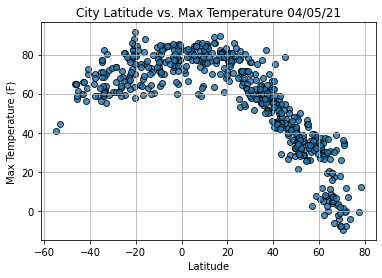

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### City Latitude vs. Humidity

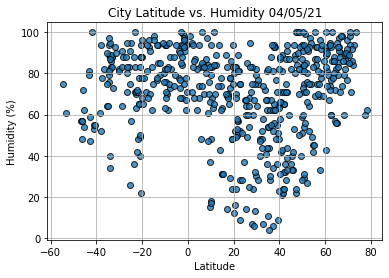

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### City Latitude vs. Cloudiness (%)

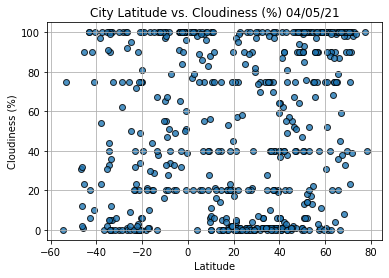

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### City Latitude vs. Wind Speed

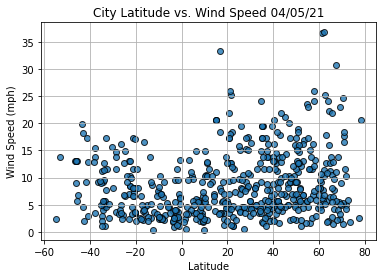

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()